<a href="https://colab.research.google.com/github/Wishbert/Portfolio/blob/main/Keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras CNN

#  Keras_CNN

Below is a classification of Malaria Cells. 
The dataset used contains images of the infected cells and unifected cells
The images are of different sizes

In [1]:
!curl -O ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  337M  100  337M    0     0  37.6M      0  0:00:08  0:00:08 --:--:-- 44.6M


In [7]:
!unzip -q cell_images.zip

replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [8]:
import os

In [9]:
num_skipped = 0
for folder_name in ("Parasitized", "Uninfected"):
    folder_path = os.path.join("cell_images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            png_true = 'png' in fname
        finally:
            fobj.close()

        if not png_true:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)
print("Deleted %d images" % num_skipped)



Deleted 2 images


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
image_size = (180, 180) #the images all have the same size 
batch_size = 32

#seeding is fixed to get a 'fixed' random data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cell_images",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cell_images",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


# Visualizing the data

In [13]:
import matplotlib.pyplot as plt

##### The labeling below shows that 1 is for uninfected Cells 0 is the infected Cells

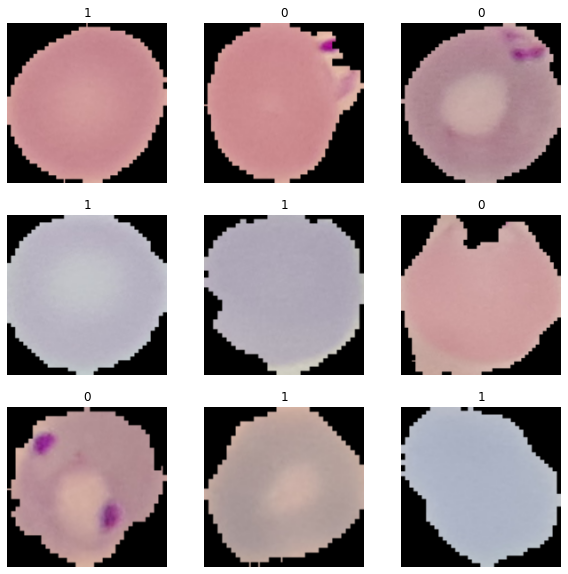

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [15]:
agumentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(factor = (-0.2,0.3)),
        layers.experimental.preprocessing.RandomZoom(height_factor=(-0.2, 0.3),width_factor=(-0.2,0.3)),
    ]
)

Visualising the agumentation


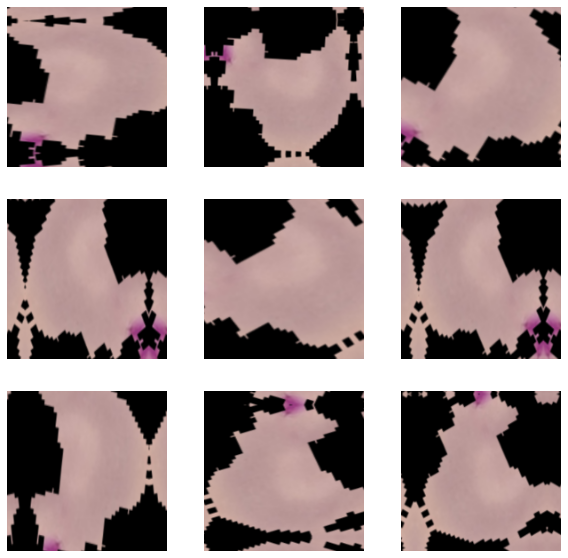

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        agumented_image = agumentation(images)
        plt.imshow(agumented_image[0].numpy().astype("uint8"))
        plt.axis("off")